In [72]:
import pandas as pd
import numpy as np

In [73]:
from src.generate_trees_scores_DEBUG import two_tail_prob

In [74]:
def get_last_detection_id(br):
    return np.array(br)[np.logical_not(np.isnan(br))][-1]

In [75]:
detections = pd.DataFrame()
detections["id"] = [0, 1, 2, 3, 4]
detections["time"] = [0, 1,1, 2, 3]
detections["object_location"] = [0, 1, 2, 3, 4]

In [76]:
for i, row in detections[detections.time == 1].iterrows():
    print(row.time)

1
1


In [88]:
hyps = [[[0]]]
scr = [0]

In [89]:
hyp = hyps[0]
det = detections[detections.time == 1]
det["id"].to_list()

[1, 2]

In [90]:
[h + [np.nan] for h in hyp] + [list(np.empty(len(hyp[0])) * np.nan) + [d] for d in det["id"].to_list()]

[[0, nan], [nan, 1], [nan, 2]]

In [84]:
def update_hyps_scores_mult(det, hyps, scores, probz, bg_prob):
    new_hyps = []
    new_scores = []    
    
    for i, row in det.iterrows():
        detection_id = row["id"]
        detection_time = row["time"]
        detection_pos = row["object_location"]
    
#     detection_id = det.iloc[0].id
#     detection_time = det.iloc[0].time
#     detection_pos = det.iloc[0].object_location
    


        # go through hypotheses
        for hyp_i, hyp in enumerate(hyps):
            existing_score = scores[hyp_i]

            # scenario where the new detection is a new individual
            # pad existing branches

            new_scen = [ h + [np.nan] for h in hyp] + [list(np.empty(len(hyp[0]))*np.nan) + [detection_id]]
            new_hyps.append(new_scen)

            # score is the existing + background prob
            new_scores.append(existing_score + bg_prob)

            # go through the branches in the hypothesis
            for i, branch in enumerate(hyp):

                # scenario where the new detection is a repeat
                repeat_scen = [branch + [detection_id]]
                repeat_scen += [hyp[j] + [np.nan]  for j in range(len(hyp)) if j!=i]

                new_hyps.append(repeat_scen)
                # calculate score
                last_detection = get_last_detection_id(branch)

                new_scores.append( existing_score +probz[int(last_detection), int(detection_id)])
    return new_hyps, new_scores

[[0, nan, nan], [nan, 1, nan], [nan, nan, 2], [nan, nan, 3]]

In [77]:
def update_hyps_scores_mult(det, hyps, scores, probz, bg_prob):
    new_hyps = []
    new_scores = []    
    
    for i, row in det.iterrows():
        detection_id = row["id"]
        detection_time = row["time"]
        detection_pos = row["object_location"]
    
#     detection_id = det.iloc[0].id
#     detection_time = det.iloc[0].time
#     detection_pos = det.iloc[0].object_location
    


        # go through hypotheses
        for hyp_i, hyp in enumerate(hyps):
            existing_score = scores[hyp_i]

            # scenario where the new detection is a new individual
            # pad existing branches

            new_scen = [ h + [np.nan] for h in hyp] + [list(np.empty(len(hyp[0]))*np.nan) + [detection_id]]
            new_hyps.append(new_scen)

            # score is the existing + background prob
            new_scores.append(existing_score + bg_prob)

            # go through the branches in the hypothesis
            for i, branch in enumerate(hyp):

                # scenario where the new detection is a repeat
                repeat_scen = [branch + [detection_id]]
                repeat_scen += [hyp[j] + [np.nan]  for j in range(len(hyp)) if j!=i]

                new_hyps.append(repeat_scen)
                # calculate score
                last_detection = get_last_detection_id(branch)

                new_scores.append( existing_score +probz[int(last_detection), int(detection_id)])
    return new_hyps, new_scores

In [41]:
def update_hyps_scores(det, hyps, scores, probz, bg_prob):
    
    detection_id = det.iloc[0].id
    detection_time = det.iloc[0].time
    detection_pos = det.iloc[0].object_location
    
    new_hyps = []
    new_scores = []

    # go through hypotheses
    for hyp_i, hyp in enumerate(hyps):
        existing_score = scores[hyp_i]

        # scenario where the new detection is a new individual
        # pad existing branches

        new_scen = [ h + [np.nan] for h in hyp] + [list(np.empty(len(hyp[0]))*np.nan) + [detection_id]]
        new_hyps.append(new_scen)

        # score is the existing + background prob
        new_scores.append(existing_score + bg_prob)

        # go through the branches in the hypothesis
        for i, branch in enumerate(hyp):

            # scenario where the new detection is a repeat
            repeat_scen = [branch + [detection_id]]
            repeat_scen += [hyp[j] + [np.nan]  for j in range(len(hyp)) if j!=i]

            new_hyps.append(repeat_scen)
            # calculate score
            last_detection = get_last_detection_id(branch)

            new_scores.append( existing_score +probz[int(last_detection), int(detection_id)])
    return new_hyps, new_scores

In [42]:
detections = pd.DataFrame()
detections["id"] = [0, 1, 2,3,4,5,6]
detections["time"] = [0, 1,2, 3, 4, 5,6]
detections["object_location"] = [0, 1, 2, 2.1, 4, 5, 6]

In [43]:
faunastep = 0.1
n_dets = len(detections)
dists = np.zeros((len(detections), len(detections)))
Dtime = np.zeros((len(detections), len(detections)))
for i in range(n_dets):
    for j in range(n_dets):
        dists[i, j] = np.abs(detections.loc[i]["object_location"] - detections.loc[j]["object_location"])
        Dtime[i, j] = np.abs(detections.loc[i]["time"] - detections.loc[j]["time"])

z_stat = np.divide(dists, faunastep * Dtime)
probz = two_tail_prob(z_stat)


/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [44]:
probz

array([[           nan, 5.73303144e-07, 5.73303144e-07, 4.65258158e-04,
        5.73303144e-07, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07,            nan, 5.73303144e-07, 5.95952647e-03,
        5.73303144e-07, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07,            nan, 6.17075077e-01,
        5.73303144e-07, 5.73303144e-07, 5.73303144e-07],
       [4.65258158e-04, 5.95952647e-03, 6.17075077e-01,            nan,
        0.00000000e+00, 4.16777723e-13, 8.03199729e-11],
       [5.73303144e-07, 5.73303144e-07, 5.73303144e-07, 0.00000000e+00,
                   nan, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07, 5.73303144e-07, 4.16777723e-13,
        5.73303144e-07,            nan, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07, 5.73303144e-07, 8.03199729e-11,
        5.73303144e-07, 5.73303144e-07,            nan]])

In [55]:
bg_prob = 0.05

In [56]:
hyps = [[[0]]]

In [57]:
scores = []
scores.append(bg_prob)

In [58]:
scores

[0.05]

In [59]:
detections.time.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [65]:
new_hyps = hyps
new_scores = scores

for t in detections.time.unique()[1:]:
    new_hyps, new_scores = update_hyps_scores_mult(detections[detections.time==t], new_hyps, new_scores, probz, bg_prob)

for i, h in enumerate(new_hyps):
    print(h, new_scores[i])

[[0, nan, nan, nan, nan, nan, nan], [nan, 1.0, nan, nan, nan, nan, nan], [nan, nan, 2.0, nan, nan, nan, nan], [nan, nan, nan, 3.0, nan, nan, nan], [nan, nan, nan, nan, 4.0, nan, nan], [nan, nan, nan, nan, nan, 5.0, nan], [nan, nan, nan, nan, nan, nan, 6.0]] 0.35
[[0, nan, nan, nan, nan, nan, 6.0], [nan, 1.0, nan, nan, nan, nan, nan], [nan, nan, 2.0, nan, nan, nan, nan], [nan, nan, nan, 3.0, nan, nan, nan], [nan, nan, nan, nan, 4.0, nan, nan], [nan, nan, nan, nan, nan, 5.0, nan]] 0.30000057330314384
[[nan, 1.0, nan, nan, nan, nan, 6.0], [0, nan, nan, nan, nan, nan, nan], [nan, nan, 2.0, nan, nan, nan, nan], [nan, nan, nan, 3.0, nan, nan, nan], [nan, nan, nan, nan, 4.0, nan, nan], [nan, nan, nan, nan, nan, 5.0, nan]] 0.30000057330314384
[[nan, nan, 2.0, nan, nan, nan, 6.0], [0, nan, nan, nan, nan, nan, nan], [nan, 1.0, nan, nan, nan, nan, nan], [nan, nan, nan, 3.0, nan, nan, nan], [nan, nan, nan, nan, 4.0, nan, nan], [nan, nan, nan, nan, nan, 5.0, nan]] 0.30000057330314384
[[nan, nan, na

In [66]:
new_scores

[0.35,
 0.30000057330314384,
 0.30000057330314384,
 0.30000057330314384,
 0.30000000008031996,
 0.30000057330314384,
 0.30000057330314384,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.30000000000041677,
 0.2500005733035606,
 0.2500005733035606,
 0.2500005733035606,
 0.2500005733035606,
 0.2500005733035606,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.2500011466062877,
 0.20000171990943155,
 0.20000171990943155,
 0.20000171990943155,
 0.200001146

In [62]:
new_hyps = hyps
new_scores = scores

for t in range(1,7):
    new_hyps, new_scores = update_hyps_scores(detections[detections.time==t], new_hyps, new_scores, probz, bg_prob)
new_hyps, new_scores

([[[0, nan, nan, nan, nan, nan, nan],
   [nan, 1.0, nan, nan, nan, nan, nan],
   [nan, nan, 2.0, nan, nan, nan, nan],
   [nan, nan, nan, 3.0, nan, nan, nan],
   [nan, nan, nan, nan, 4.0, nan, nan],
   [nan, nan, nan, nan, nan, 5.0, nan],
   [nan, nan, nan, nan, nan, nan, 6.0]],
  [[0, nan, nan, nan, nan, nan, 6.0],
   [nan, 1.0, nan, nan, nan, nan, nan],
   [nan, nan, 2.0, nan, nan, nan, nan],
   [nan, nan, nan, 3.0, nan, nan, nan],
   [nan, nan, nan, nan, 4.0, nan, nan],
   [nan, nan, nan, nan, nan, 5.0, nan]],
  [[nan, 1.0, nan, nan, nan, nan, 6.0],
   [0, nan, nan, nan, nan, nan, nan],
   [nan, nan, 2.0, nan, nan, nan, nan],
   [nan, nan, nan, 3.0, nan, nan, nan],
   [nan, nan, nan, nan, 4.0, nan, nan],
   [nan, nan, nan, nan, nan, 5.0, nan]],
  [[nan, nan, 2.0, nan, nan, nan, 6.0],
   [0, nan, nan, nan, nan, nan, nan],
   [nan, 1.0, nan, nan, nan, nan, nan],
   [nan, nan, nan, 3.0, nan, nan, nan],
   [nan, nan, nan, nan, 4.0, nan, nan],
   [nan, nan, nan, nan, nan, 5.0, nan]],
  [[

In [63]:
new_scores

[0.35,
 0.30000057330314384,
 0.30000057330314384,
 0.30000057330314384,
 0.30000000008031996,
 0.30000057330314384,
 0.30000057330314384,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.30000000000041677,
 0.2500005733035606,
 0.2500005733035606,
 0.2500005733035606,
 0.2500005733035606,
 0.2500005733035606,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.30000057330314384,
 0.2500011466062877,
 0.2500011466062877,
 0.2500011466062877,
 0.2500005733834638,
 0.2500011466062877,
 0.2500011466062877,
 0.20000171990943155,
 0.20000171990943155,
 0.20000171990943155,
 0.200001146

In [64]:
import matplotlib.pyplot as plt

/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


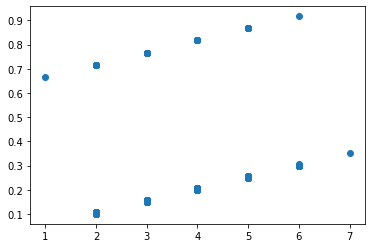

In [67]:
fig, ax = plt.subplots()
ax.scatter([len(h) for h in new_hyps], new_scores)
fig.show()

In [68]:
np.argmax(new_scores)

295

In [71]:
detections

,id,time,object_location
0,0,0,0.0
1,1,1,1.0
2,2,2,2.0
3,3,3,2.1
4,4,4,4.0
5,5,5,5.0
6,6,6,6.0


In [70]:
new_hyps[np.argmax(new_scores)]

[[nan, nan, 2.0, 3.0, nan, nan, nan],
 [0, nan, nan, nan, nan, nan, nan],
 [nan, 1.0, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, 4.0, nan, nan],
 [nan, nan, nan, nan, nan, 5.0, nan],
 [nan, nan, nan, nan, nan, nan, 6.0]]